In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Path to the files
path = "raw_data/"

#Reading the files and creating the dataframes
clinicaltrial = pd.read_csv(path+"clinicaltrial_data.csv")
mouse_drug = pd.read_csv(path+"mouse_drug_data.csv")

In [3]:
#Merge the two dataframe on the mouse id
Clinicaltrial_mouse_drug = pd.merge(clinicaltrial,mouse_drug, on="Mouse ID",how ="left")
CMD = Clinicaltrial_mouse_drug

# Tumor Response to the Treatment

In [4]:
#Method 1 - Without pivot table without errorbar

In [5]:
CMD_TumVol = CMD.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]
CMD_TumVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0
1,Ketapril,0,45.0
2,Ketapril,0,45.0
3,Ketapril,0,45.0
4,Ketapril,0,45.0


In [6]:
CMD_TumVol_Crosstab = pd.crosstab(CMD_TumVol["Timepoint"],CMD_TumVol["Drug"],
                                  values=CMD_TumVol["Tumor Volume (mm3)"],aggfunc=np.mean)
CMD_TumVol_Crosstab #"Display"

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


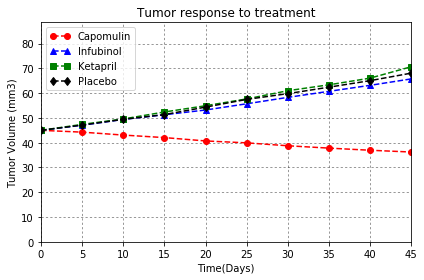

In [7]:
CMD_C = CMD.loc[CMD["Drug"]=="Capomulin"].groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
CMD_I = CMD.loc[CMD["Drug"]=="Infubinol"].groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
CMD_K = CMD.loc[CMD["Drug"]=="Ketapril"].groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
CMD_P = CMD.loc[CMD["Drug"]=="Placebo"].groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

CMD_C = pd.DataFrame(CMD_C.reset_index())
CMD_I = pd.DataFrame(CMD_I.reset_index())
CMD_K = pd.DataFrame(CMD_K.reset_index())
CMD_P = pd.DataFrame(CMD_P.reset_index())

CMD_C_Handle,= plt.plot(CMD_C["Timepoint"],CMD_C["Tumor Volume (mm3)"],color="r",linestyle="--",marker='o',label="Capomulin")
CMD_I_Handle,= plt.plot(CMD_I["Timepoint"],CMD_I["Tumor Volume (mm3)"],color = "b",linestyle="--",marker='^',label="Infubinol")
CMD_K_Handle,= plt.plot(CMD_K["Timepoint"],CMD_K["Tumor Volume (mm3)"],color = "g",linestyle="--",marker='s',label="Ketapril")
CMD_P_Handle,= plt.plot(CMD_P["Timepoint"],CMD_P["Tumor Volume (mm3)"],color = "black",linestyle="--",marker='d',label="Placebo")

plt.legend(handles=[CMD_C_Handle,CMD_I_Handle,CMD_K_Handle,CMD_P_Handle],numpoints=2)
plt.xlim(0,CMD["Timepoint"].max())
plt.ylim(0,CMD["Tumor Volume (mm3)"].max()+10)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor response to treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
#Method 2 - With Pivot (with & without errorbar)

In [9]:
CMD_TumVol_G = CMD_TumVol.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

In [10]:
CMD_TumVol_GD = pd.DataFrame(CMD_TumVol_G)
CMD_TumVol_GD.head() #Display

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [11]:
CMD_TumVol_P = CMD_TumVol_G.reset_index()

In [12]:
CMD_TumVol_PD= pd.DataFrame(CMD_TumVol_P)
CMD_TumVol_PD.head() #No need to display

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [13]:
CMD_TumVol_PivotTable = CMD_TumVol_PD.pivot_table(values='Tumor Volume (mm3)',index="Timepoint",
                                                     columns="Drug")
CMD_TumVol_PivotTable #Display

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [14]:
#Plotting Without errorbar

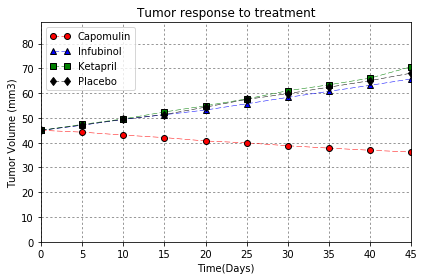

In [15]:
HandleC,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Capomulin"],
          linewidth=0.5,color="r",linestyle="--",marker='o',markeredgecolor="black",label="Capomulin")
HandleI,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
HandleK,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
HandleP,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Placebo"],
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(handles=[HandleC,HandleI,HandleK,HandleP],numpoints=2)
plt.xlim(0,CMD["Timepoint"].max())
plt.ylim(0,CMD["Tumor Volume (mm3)"].max()+10)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor response to treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()
plt.show()

In [16]:
#With errorbar

In [17]:
#Calculating error and converting it to the pivot table
CMD_TumVol_SEM = CMD_TumVol.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
CMD_TumVol_SEM = CMD_TumVol_SEM.reset_index()
CMD_TumVol_SEM = pd.DataFrame(CMD_TumVol_SEM)
CMD_TumVol_SEM_PT = CMD_TumVol_SEM.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)") 
CMD_TumVol_SEM_PT

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


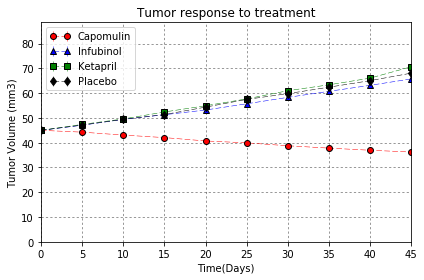

In [18]:
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Capomulin"],
             yerr=CMD_TumVol_SEM_PT["Capomulin"],linewidth=0.5,color="r",linestyle="--",
             marker='o',markeredgecolor="black",label="Capomulin")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Infubinol"],
             yerr=CMD_TumVol_SEM_PT["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Ketapril"],
             yerr=CMD_TumVol_SEM_PT["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Placebo"],
              yerr=CMD_TumVol_SEM_PT["Placebo"], 
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(numpoints=2,loc="best")
plt.xlim(0,CMD["Timepoint"].max())
plt.ylim(0,CMD["Tumor Volume (mm3)"].max()+10)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor response to treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

# Metastatic Response to Treatment

In [19]:
CMD_MetSite = CMD.loc[:,["Drug","Timepoint","Metastatic Sites"]]

In [20]:
#Method 1 - Without pivot table without errorbar

In [21]:
CMD_MetSite_Crosstab = pd.crosstab(CMD_MetSite["Timepoint"],CMD_MetSite["Drug"],
                                   values=CMD_MetSite["Metastatic Sites"],aggfunc=np.mean)
CMD_MetSite_Crosstab

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


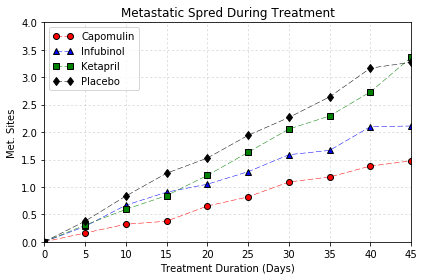

In [22]:
CMD_MetSite_C = CMD_MetSite.loc[CMD_MetSite["Drug"]=="Capomulin"]
CMD_MetSite_C = CMD_MetSite_C.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
CMD_MetSite_C = CMD_MetSite_C.reset_index() 
CMD_MetSite_C = pd.DataFrame(CMD_MetSite_C)

CMD_MetSite_I = CMD_MetSite.loc[CMD_MetSite["Drug"]=="Infubinol"]
CMD_MetSite_I = CMD_MetSite_I.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
CMD_MetSite_I = CMD_MetSite_I.reset_index() 
CMD_MetSite_I = pd.DataFrame(CMD_MetSite_I)

CMD_MetSite_K = CMD_MetSite.loc[CMD_MetSite["Drug"]=="Ketapril"]
CMD_MetSite_K = CMD_MetSite_K.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
CMD_MetSite_K = CMD_MetSite_K.reset_index() 
CMD_MetSite_K = pd.DataFrame(CMD_MetSite_K)

CMD_MetSite_P = CMD_MetSite.loc[CMD_MetSite["Drug"]=="Placebo"]
CMD_MetSite_P = CMD_MetSite_P.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
CMD_MetSite_P = CMD_MetSite_P.reset_index() 
CMD_MetSite_P = pd.DataFrame(CMD_MetSite_P)

CMD_MetStite_CPlot,=plt.plot(CMD_MetSite_C["Timepoint"],CMD_MetSite_C["Metastatic Sites"],
                          color="r",linestyle="--",linewidth=0.5,marker='o',markeredgecolor='black',
                          label="Capomulin")
CMD_MetStite_IPlot,=plt.plot(CMD_MetSite_I["Timepoint"],CMD_MetSite_I["Metastatic Sites"],
                          color="b",linestyle="--",linewidth=0.5,marker='^',markeredgecolor='black',
                          label="Infubinol")
CMD_MetStite_KPlot,=plt.plot(CMD_MetSite_K["Timepoint"],CMD_MetSite_K["Metastatic Sites"],
                          color="g",linestyle="--",linewidth=0.5,marker='s',markeredgecolor='black',
                          label="Ketapril")
CMD_MetStite_PPlot,=plt.plot(CMD_MetSite_P["Timepoint"],CMD_MetSite_P["Metastatic Sites"],
                          color="black",linestyle="--",linewidth=0.5,marker='d',markeredgecolor='black',
                          label="Placebo")

plt.xlim(0,CMD_MetSite["Timepoint"].max())
plt.ylim(0,CMD_MetSite["Metastatic Sites"].max())
plt.legend(handles=[CMD_MetStite_CPlot,CMD_MetStite_IPlot,CMD_MetStite_KPlot,CMD_MetStite_PPlot],numpoints=2)
plt.grid(linestyle=":",alpha=0.5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spred During Treatment")
plt.tight_layout()
plt.show()

In [23]:
#Method 2 - Using Pivot Table with errorbar

In [24]:
CMD_MetSite_Sem = CMD_MetSite.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
CMD_MetSite_Sem = CMD_MetSite_Sem.reset_index()
CMD_MedSite_Sem = pd.DataFrame(CMD_MetSite_Sem)
CMD_MedSite_Sem_PT = CMD_MedSite_Sem.pivot_table(index="Timepoint",
                                                 columns="Drug",
                                                 values="Metastatic Sites")
CMD_MedSite_Sem_PT

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [25]:
CMD_MetSite_G = CMD_MetSite.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

In [26]:
CMD_MetSite_GD = pd.DataFrame(CMD_MetSite_G)
CMD_MetSite_GD.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [27]:
CMD_MetSite_P = CMD_MetSite_G.reset_index()

In [28]:
CMD_MetSite_PD = pd.DataFrame(CMD_MetSite_P)
CMD_MetSite_PD.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [29]:
CMD_MetSite_PivotTable = CMD_MetSite_PD.pivot_table(index="Timepoint",
                                                    columns="Drug",
                                                    values="Metastatic Sites")
CMD_MetSite_PivotTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


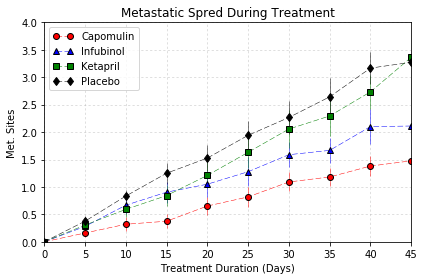

In [30]:
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Capomulin"],
             yerr=CMD_MedSite_Sem_PT["Capomulin"],linewidth=0.5,color="r",linestyle="--",
             marker='o',markeredgecolor="black",label="Capomulin")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Infubinol"],
             yerr=CMD_MedSite_Sem_PT["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Ketapril"],
             yerr=CMD_MedSite_Sem_PT["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Placebo"],
              yerr=CMD_MedSite_Sem_PT["Placebo"], 
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")

plt.xlim(0,CMD_MetSite["Timepoint"].max())
plt.ylim(0,CMD_MetSite["Metastatic Sites"].max())
plt.legend(handles=[CMD_MetStite_CPlot,CMD_MetStite_IPlot,CMD_MetStite_KPlot,CMD_MetStite_PPlot],numpoints=2)
plt.grid(linestyle=":",alpha=0.5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spred During Treatment")
plt.tight_layout()
plt.show()

# Survival Rates

In [31]:
CMD_Survival = CMD.loc[:,["Drug","Timepoint","Mouse ID"]]
CMD_Survival = CMD_Survival.rename(columns={"Mouse ID":"Mouse Count"})

In [50]:
CMD_Survival_G = CMD_Survival.groupby(["Drug","Timepoint"])["Mouse Count"].count()
CMD_Survival_G = pd.DataFrame(CMD_Survival_G)
CMD_Survival_G.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [51]:
#Method 1 - Without Pivot Table (no percent)

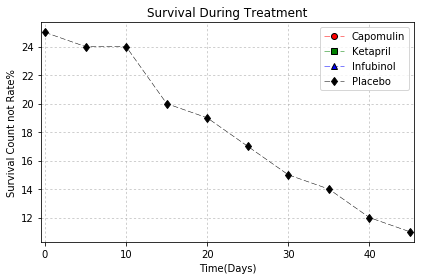

In [52]:
CMD_Survival_C = CMD_Survival_P.loc[CMD_Survival_P["Drug"]=="Capomulin",:]
CMD_Survival_CPlot,=plt.plot(CMD_Survival_C["Timepoint"],CMD_Survival_C["Mouse Count"],
                             color="r",linestyle="--",linewidth=0.5,marker="o",label="Capomulin",
                             markeredgecolor="black")
CMD_Survival_I = CMD_Survival_P.loc[CMD_Survival_P["Drug"]=="Infubinol",:]
CMD_Survival_IPlot,=plt.plot(CMD_Survival_I["Timepoint"],CMD_Survival_I["Mouse Count"],
                             color="b",linestyle="--",linewidth=0.5,marker="^",label="Infubinol",
                             markeredgecolor="black") 
CMD_Survival_K = CMD_Survival_P.loc[CMD_Survival_P["Drug"]=="Ketapril",:]
CMD_Survival_KPlot,=plt.plot(CMD_Survival_K["Timepoint"],CMD_Survival_K["Mouse Count"],
                             color="g",linestyle="--",linewidth=0.5,marker="s",label="Ketapril",
                             markeredgecolor="black") 
CMD_Survival_P = CMD_Survival_P.loc[CMD_Survival_P["Drug"]=="Placebo",:]
CMD_Survival_PPlot,=plt.plot(CMD_Survival_P["Timepoint"],CMD_Survival_P["Mouse Count"],
                             color="black",linestyle="--",linewidth=0.5,marker="d",label="Placebo",
                             markeredgecolor="black")
plt.xlim(-.5,45.5)
#plt.ylim(40,100)
plt.legend(handles=[CMD_Survival_CPlot,CMD_Survival_KPlot,CMD_Survival_IPlot,CMD_Survival_PPlot])
plt.xlabel("Time(Days)")
plt.ylabel("Survival Count not Rate%")
plt.title("Survival During Treatment")
plt.grid(linestyle=":",alpha=0.75)
plt.tight_layout()
plt.show()

In [35]:
#Method 2 - With Pivot Table (without errorbar)

In [40]:
CMD_Survival_P = CMD_Survival_G.reset_index()
CMD_Survival_P = pd.DataFrame(CMD_Survival_P)
CMD_Survival_P

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [41]:
CMD_Survival.PivotTable = CMD_Survival_P.pivot_table(values="Mouse Count",index="Timepoint",
                                                     columns="Drug")
CMD_Survival.PivotTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


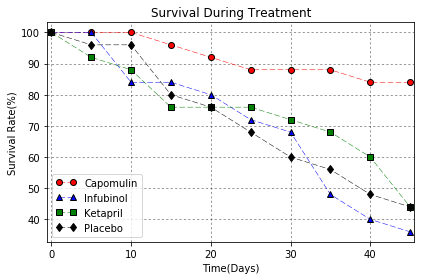

In [53]:
HandleC,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Capomulin"]/CMD_Survival.PivotTable["Capomulin"][0])*100,
          linewidth=0.5,color="r",linestyle="--",marker='o',markeredgecolor="black",label="Capomulin")
HandleI,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Infubinol"]/CMD_Survival.PivotTable["Infubinol"][0])*100,
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
HandleK,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Ketapril"]/CMD_Survival.PivotTable["Ketapril"][0])*100,
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
HandleP,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Placebo"]/CMD_Survival.PivotTable["Placebo"][0])*100,
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(handles=[HandleC,HandleI,HandleK,HandleP],numpoints=2)
plt.xlim(-.5,45.5)
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#With errorbar

# Summary Bar Graph

In [44]:
TumVol_Per_Chg =  (CMD_TumVol_PivotTable.iloc[-1] - CMD_TumVol_PivotTable.iloc[0]) / CMD_TumVol_PivotTable.iloc[0] * 100
TumVol_Per_Chg = TumVol_Per_Chg.reset_index()
TumVol_Per_Chg = pd.DataFrame(TumVol_Per_Chg)
TumVol_Per_Chg.rename(columns={0:"Total Volume Percent Change"},inplace=True)
TumVol_Per_Chg

,Drug,Total Volume Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [45]:
TumVol_Per_Chg_CIKP = TumVol_Per_Chg.loc[TumVol_Per_Chg["Drug"].isin
                                         (["Capomulin","Infubinol","Ketapril","Placebo"]),
                                         ["Drug","Total Volume Percent Change"]]
TumVol_Per_Chg_CIKP["Sign"] = (TumVol_Per_Chg_CIKP["Total Volume Percent Change"] >= 0)
TumVol_Per_Chg_CIKP

,Drug,Total Volume Percent Change,Sign
0,Capomulin,-19.475303,False
2,Infubinol,46.123472,True
3,Ketapril,57.028795,True
5,Placebo,51.297960,True


In [46]:
x_axis = np.arange(len(TumVol_Per_Chg_CIKP))
x_ticks = TumVol_Per_Chg_CIKP["Drug"]
x_ticks_list = list(x_ticks)

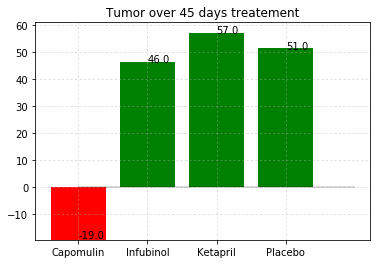

In [47]:
plt.bar(x_axis,TumVol_Per_Chg_CIKP["Total Volume Percent Change"],
        color=TumVol_Per_Chg_CIKP["Sign"].map({True:"g",False:"r"}))      

plt.hlines(0, 0, len(x_axis), alpha=0.2)
plt.xticks(x_axis,x_ticks_list)
plt.title("Tumor over 45 days treatement")
plt.grid(linestyle=":",alpha=0.5)
for a,b in zip(x_axis, round(TumVol_Per_Chg_CIKP["Total Volume Percent Change"])):
    plt.text(a, b, str(b))
plt.show()